In [1]:
# importing libraries
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# plot style
style.use("ggplot")

In [2]:
# loading data
filename = "../MLdata/eGrid_stability.csv"
eGrid = pd.read_csv(filename)

In [3]:
# showing first 10 samples of each feature and labels
eGrid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
eGrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
stabf = {'unstable':0, 'stable':1}

eGrid['stabf'] = eGrid['stabf'].map(stabf) 

eGrid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [6]:
eGrid.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,0.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403,1.000000


In [7]:
# checking for correlation
eGrid.corr(method='pearson')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761,-0.234898
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975,-0.246280
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700,-0.237492
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576,-0.239375
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278,-0.009938
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255,-0.006173
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321,0.000649
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786,0.022785
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774,-0.197664
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601,-0.217341


<IPython.core.display.Javascript object>


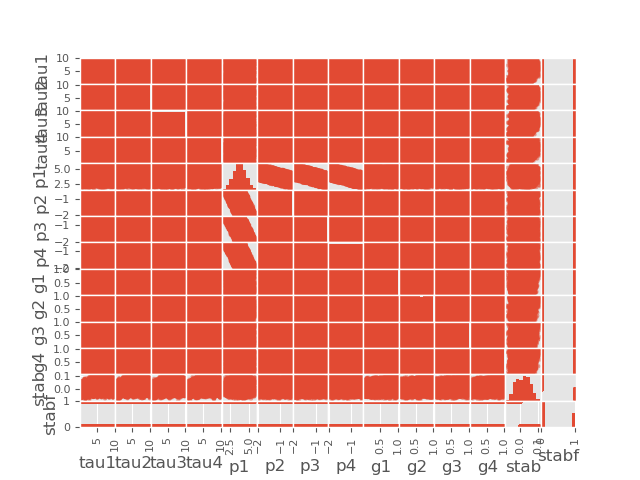

In [8]:
# further correlation view
eGrid_corr = scatter_matrix(eGrid)

<IPython.core.display.Javascript object>


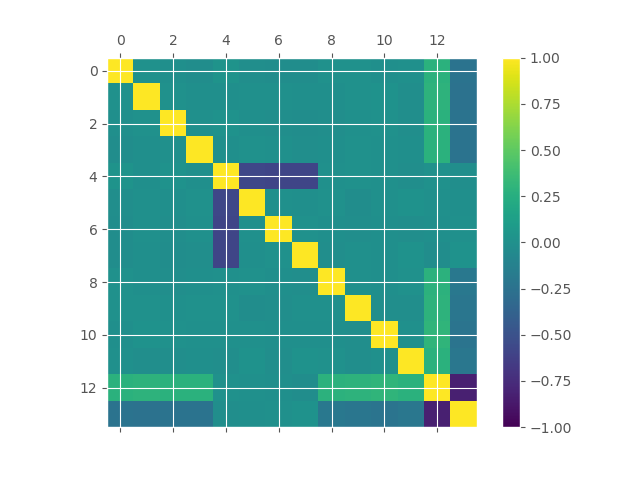

In [9]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(eGrid.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

<IPython.core.display.Javascript object>


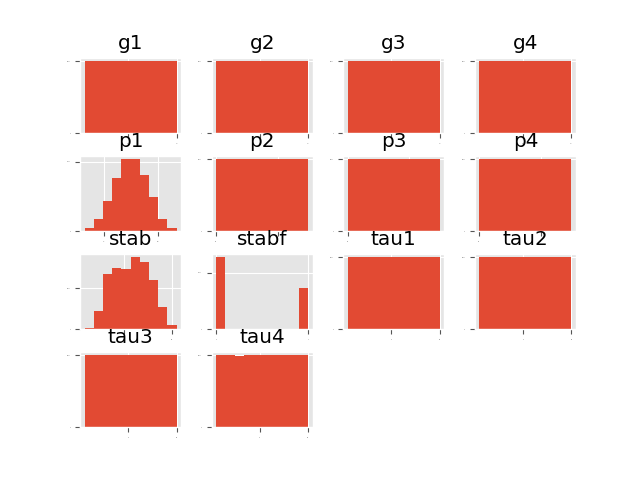

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020989C60408>,
      dtype=object)

In [10]:
# histogram view
eGrid.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

<IPython.core.display.Javascript object>


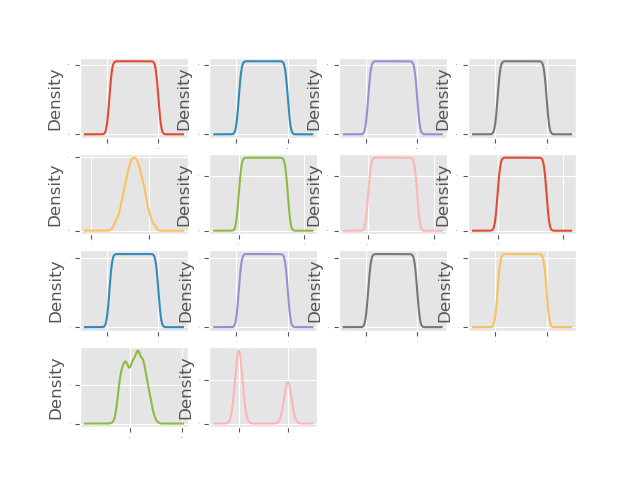

In [11]:
# checking for distribution with curve shape
eGrid.plot(kind='density', subplots=True, sharex=False,
           layout=(4,4), legend=False, fontsize=1)
plt.show()

<IPython.core.display.Javascript object>


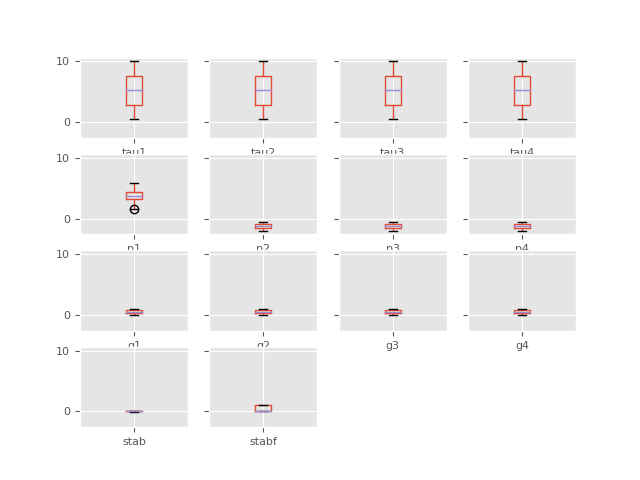

In [12]:
# box plot view
eGrid.plot(kind='box', subplots=True, sharex=False, sharey=True,
           layout=(4,4), legend=False, fontsize=8)
plt.show()

In [13]:
# array of features and labels
X = np.array(eGrid.drop(['stabf'],1))
y = np.array(eGrid['stabf'])

In [14]:
# check size of features and labels
print("size of features: {}".format(len(X)))
print("size of labels: {}".format(len(y)))

size of features: 10000
size of labels: 10000


In [15]:
# splitting into train, development and test sets
from sklearn.model_selection import train_test_split

test_size = 0.2
dev_size = 0.25
seed1 = 42
seed2 = 44

X_train_dev, X_test, y_train_dev, y_test = train_test_split (X, y,
                                                      test_size=test_size,
                                                      random_state=seed1)

X_train, X_dev, y_train, y_dev = train_test_split (X_train_dev, y_train_dev,
                                                      test_size=dev_size,
                                                      random_state=seed2)

print("size of train set: {}".format(len(X_train)))
print("size of development set: {}".format(len(X_dev)))
print("size of test set: {}".format(len(X_test)))

size of train set: 6000
size of development set: 2000
size of test set: 2000


In [16]:
# normalizing train, development and test features 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

In [17]:
# checking array dimensions
print('train features:{}, train labels:{}'.format(X_train.shape, y_train.shape))
print('development features:{}, development labels:{}'.format(X_dev.shape, y_dev.shape))
print('test features:{}, test labels:{}'.format(X_test.shape, y_test.shape))

train features:(6000, 13), train labels:(6000,)
development features:(2000, 13), development labels:(2000,)
test features:(2000, 13), test labels:(2000,)


<IPython.core.display.Javascript object>


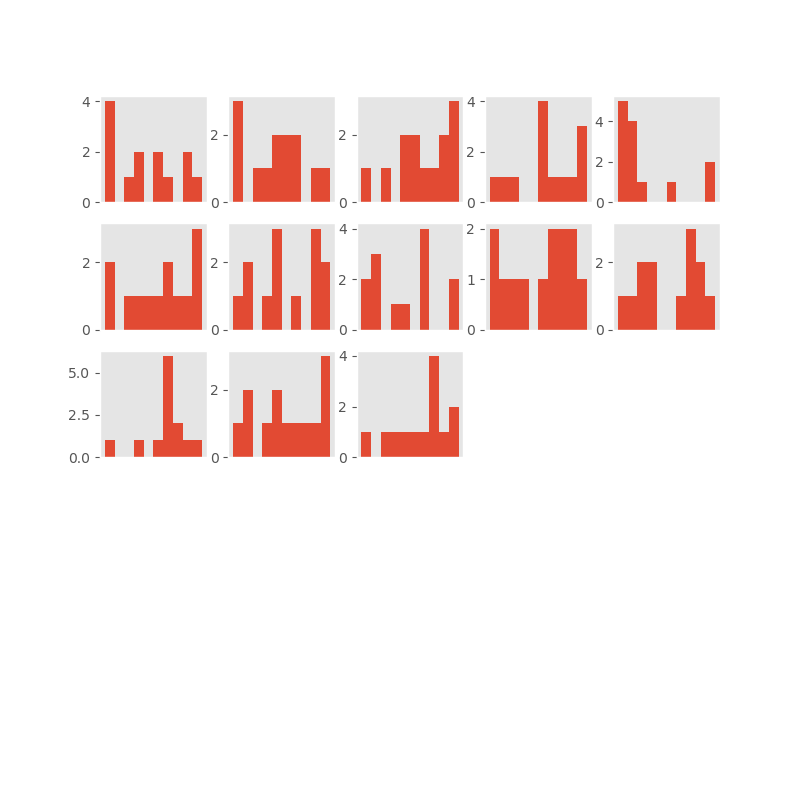

In [18]:
# showing normalized features
plt.figure(figsize=(8,8))
for i in range(X_train.shape[1]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.xticks([])
    plt.grid(False)
    plt.hist(X_train[i])
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [20]:
# model selection
models = []
names = []

models.append(('LR', LogisticRegression()))
models.append(('smv', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DCtree', DecisionTreeClassifier()))
models.append(('RmForest', RandomForestClassifier())) 
models.append(('XGB', XGBClassifier()))


for name, model in models:
    classifier = model
    classifier.fit(X_train, y_train)
    
    train_result = classifier.score(X_train, y_train)
    dev_result = classifier.score(X_dev, y_dev)
    print(name)
    print("training results: {}".format(train_result))
    print("development acuracy: {}".format(dev_result))

C:\Users\HP\AnacondaNew\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR
training results: 0.9898333333333333
development acuracy: 0.986


C:\Users\HP\AnacondaNew\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


smv
training results: 0.982
development acuracy: 0.982
KNN
training results: 0.9541666666666667
development acuracy: 0.91
DCtree
training results: 1.0
development acuracy: 1.0


C:\Users\HP\AnacondaNew\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RmForest
training results: 1.0
development acuracy: 1.0
XGB
training results: 1.0
development acuracy: 1.0


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc

In [22]:
def model_metric(model):
    classifier = model
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, predict)
    precision, recall, thresholds = precision_recall_curve(y_test, predict)
    print("test accuracy: {}".format(test_accuracy))
    print("AUC Score: {}".format(auc(recall, precision)))

In [23]:
# evaluating selected models on test set
selected_models = []
selected_models.append(('DCtree', DecisionTreeClassifier()))
selected_models.append(('RmForest', RandomForestClassifier(n_estimators=100))) 
selected_models.append(('XGB', XGBClassifier()))

for name, model in selected_models:
    print("=========Results for {}==========".format(name))
    (model_metric(model))

=========Results for DCtree==========
test accuracy: 0.9995
AUC Score: 0.9992795389048992
=========Results for RmForest==========
test accuracy: 0.9995
AUC Score: 0.9992795389048992
=========Results for XGB==========
test accuracy: 0.9995
AUC Score: 0.9992795389048992
